In [5]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

In [94]:
f=pd.read_csv(r"Trips_2018.csv")

In [107]:
f.describe()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [ ]:
f = f.rename({"Unnamed: 0": "Trip ID"}, axis="columns")
f = f.set_index("Trip ID")


In [108]:
f.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
Trip ID,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [109]:
f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
sm_dummies=pd.get_dummies(f, columns=['usertype'])
sm_dummies.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,weekday,is_weekend,usertype_Customer,usertype_Subscriber
Trip ID,,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,0,False,False,True
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,0,False,False,True
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,0,False,False,True
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,0,False,False,True
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,0,False,False,True


In [110]:
f.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
dtype: object

In [111]:
sm_dummies.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
usertype_Customer                    bool
usertype_Subscriber                  bool
dtype: object

# Clustering

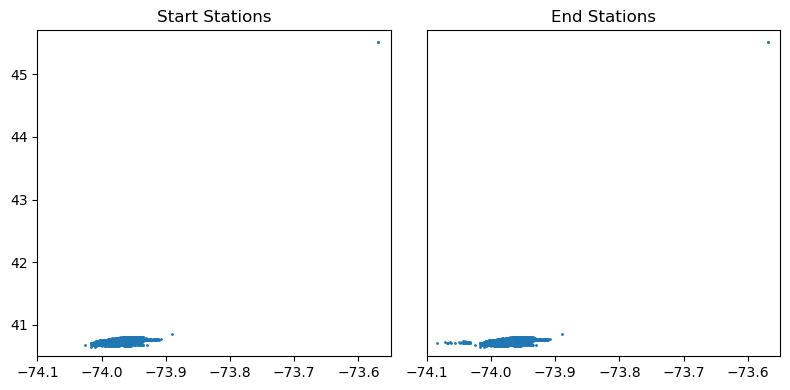

In [166]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.55), (40.5, 45.7)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
x=start_station_df[['start_station_longitude', 'start_station_latitude']]
ax1.scatter(x['start_station_longitude'],x['start_station_latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
x=end_station_df[['end_station_longitude', 'end_station_latitude']]
ax2.scatter(x['end_station_longitude'],x['end_station_latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

## DBScan

In [126]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(min_samples=5, eps=0.003) 
dbs.fit(x)

,eps,0.003
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [127]:
np.unique(dbs.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33])

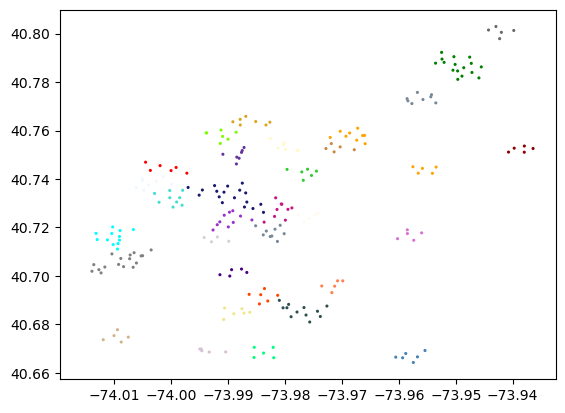

In [128]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(dbs.labels_))-1   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
x_=[]
y_=[]
c_=[]
for label, x_val, y_val in zip(dbs.labels_, x['start_station_longitude'], x['start_station_latitude']):
    if label==-1:
        continue
    x_.append(x_val)
    y_.append(y_val)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=1.5,c=c_)
plt.show()

## K-means

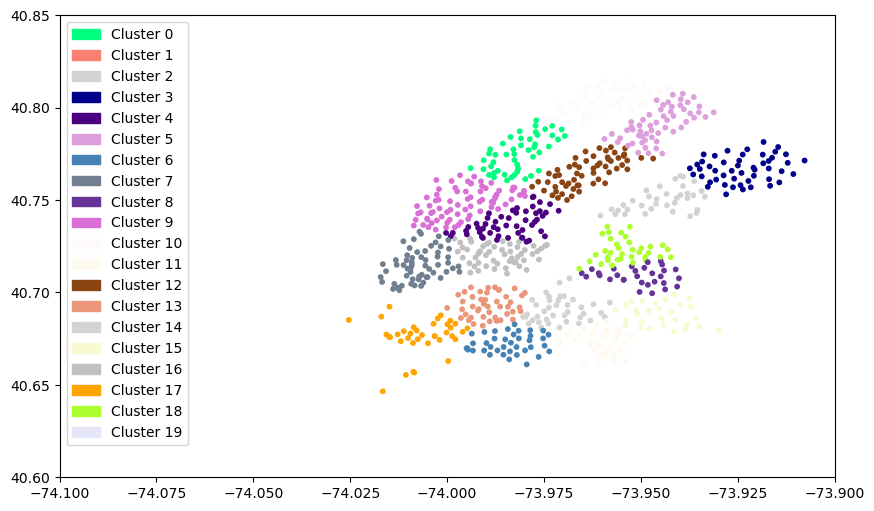

In [143]:
from sklearn.cluster import KMeans
K=20
k=KMeans(K)
k.fit(start_station_df)
dt_clusters=start_station_df.copy()
dt_clusters['cluster']=k.fit_predict(start_station_df)
num_colors=K  #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors = random.choices(colors,k=K)  

x_points=dt_clusters["start_station_longitude"]
y_points=dt_clusters["start_station_latitude"]
# Get labels and cluster centers
labels = dt_clusters["cluster"]
x_=[]
y_=[]
c_=[]
for label, x, y in zip(labels, x_points, y_points):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
plt.figure(figsize=(10, 6))
plt.scatter(x_,y_,s=10,c=c_)
plt.xlim(-74.1,-73.9)
plt.ylim(40.6,40.85)
legend_patches = [
    Patch(color = cluster_colors[i], label=f"Cluster {i}")
    for i in range(K)
]
plt.legend(handles = legend_patches)
plt.show()

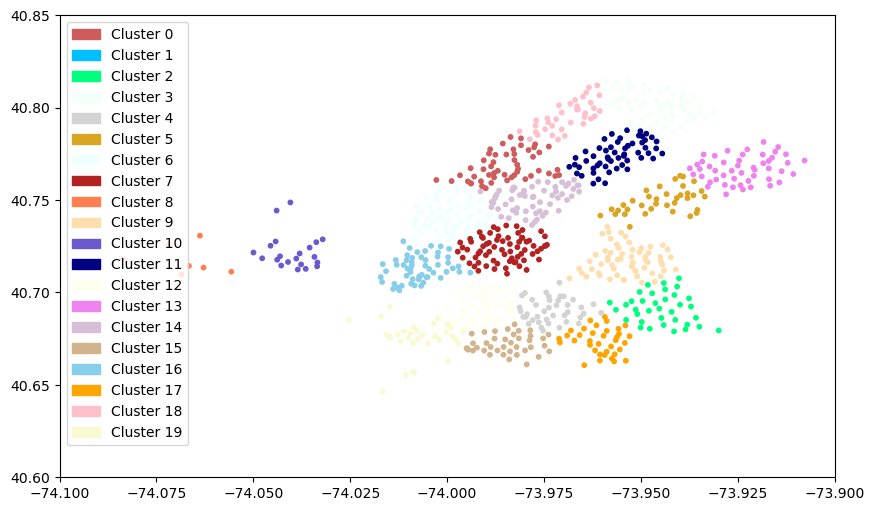

In [144]:
K=20
k=KMeans(K)
k.fit(end_station_df)
dt_clusters=end_station_df.copy()
dt_clusters['cluster']=k.fit_predict(end_station_df)
num_colors=K  #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors = random.choices(colors,k=K)  

x_points=dt_clusters["end_station_longitude"]
y_points=dt_clusters["end_station_latitude"]
# Get labels and cluster centers
labels = dt_clusters["cluster"]
x_=[]
y_=[]
c_=[]
for label, x, y in zip(labels, x_points, y_points):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
plt.figure(figsize=(10, 6))
plt.scatter(x_,y_,s=10,c=c_)
plt.xlim(-74.1,-73.9)
plt.ylim(40.6,40.85)
legend_patches = [
    Patch(color = cluster_colors[i], label=f"Cluster {i}")
    for i in range(K)
]
plt.legend(handles = legend_patches)
plt.show()